In [1]:
import numpy as py
import matplotlib.pyplot as pyplot
import pandas as pd
#AADITH LASAR 
#2203262 LY-CORE-2

In [2]:
data = pd.read_csv("Whole_cust.csv")

In [3]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
data.shape

(440, 8)

In [5]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
data.dropna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [7]:
data.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [8]:
data.kurtosis()

Channel              -1.427463
Region               -0.100111
Fresh                11.536408
Milk                 24.669398
Grocery              20.914670
Frozen               54.689281
Detergents_Paper     19.009464
Delicassen          170.694939
dtype: float64

In [9]:
import seaborn as sns

<Axes: xlabel='Channel', ylabel='Region'>

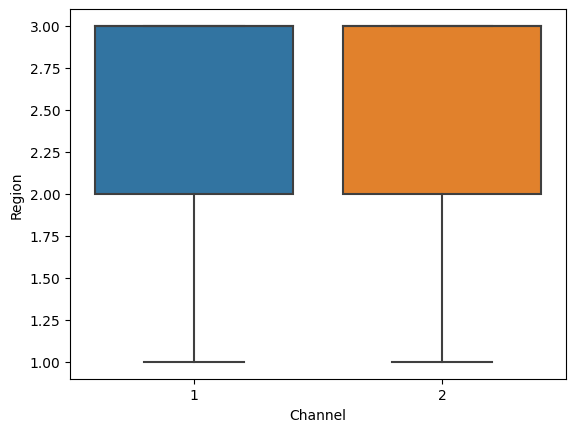

In [18]:
sns.boxplot(x="Channel", y="Region", data=data)

<Axes: xlabel='Grocery', ylabel='Detergents_Paper'>

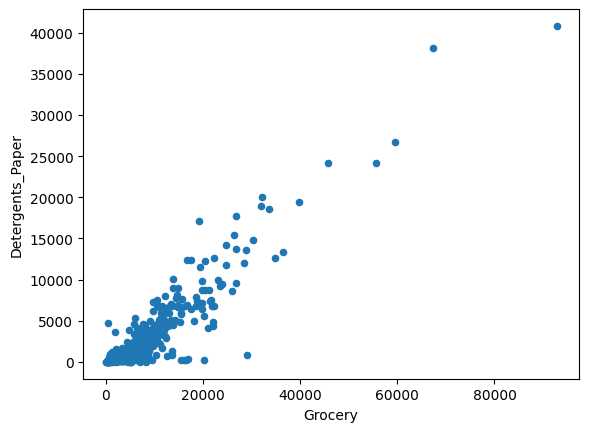

In [19]:
data.plot(kind="scatter", x="Grocery", y="Detergents_Paper")

<Axes: xlabel='Channel', ylabel='Region'>

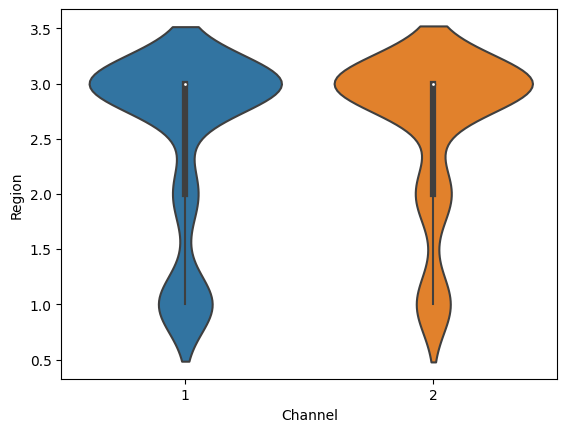

In [20]:
sns.violinplot(x="Channel", y="Region", data=data)

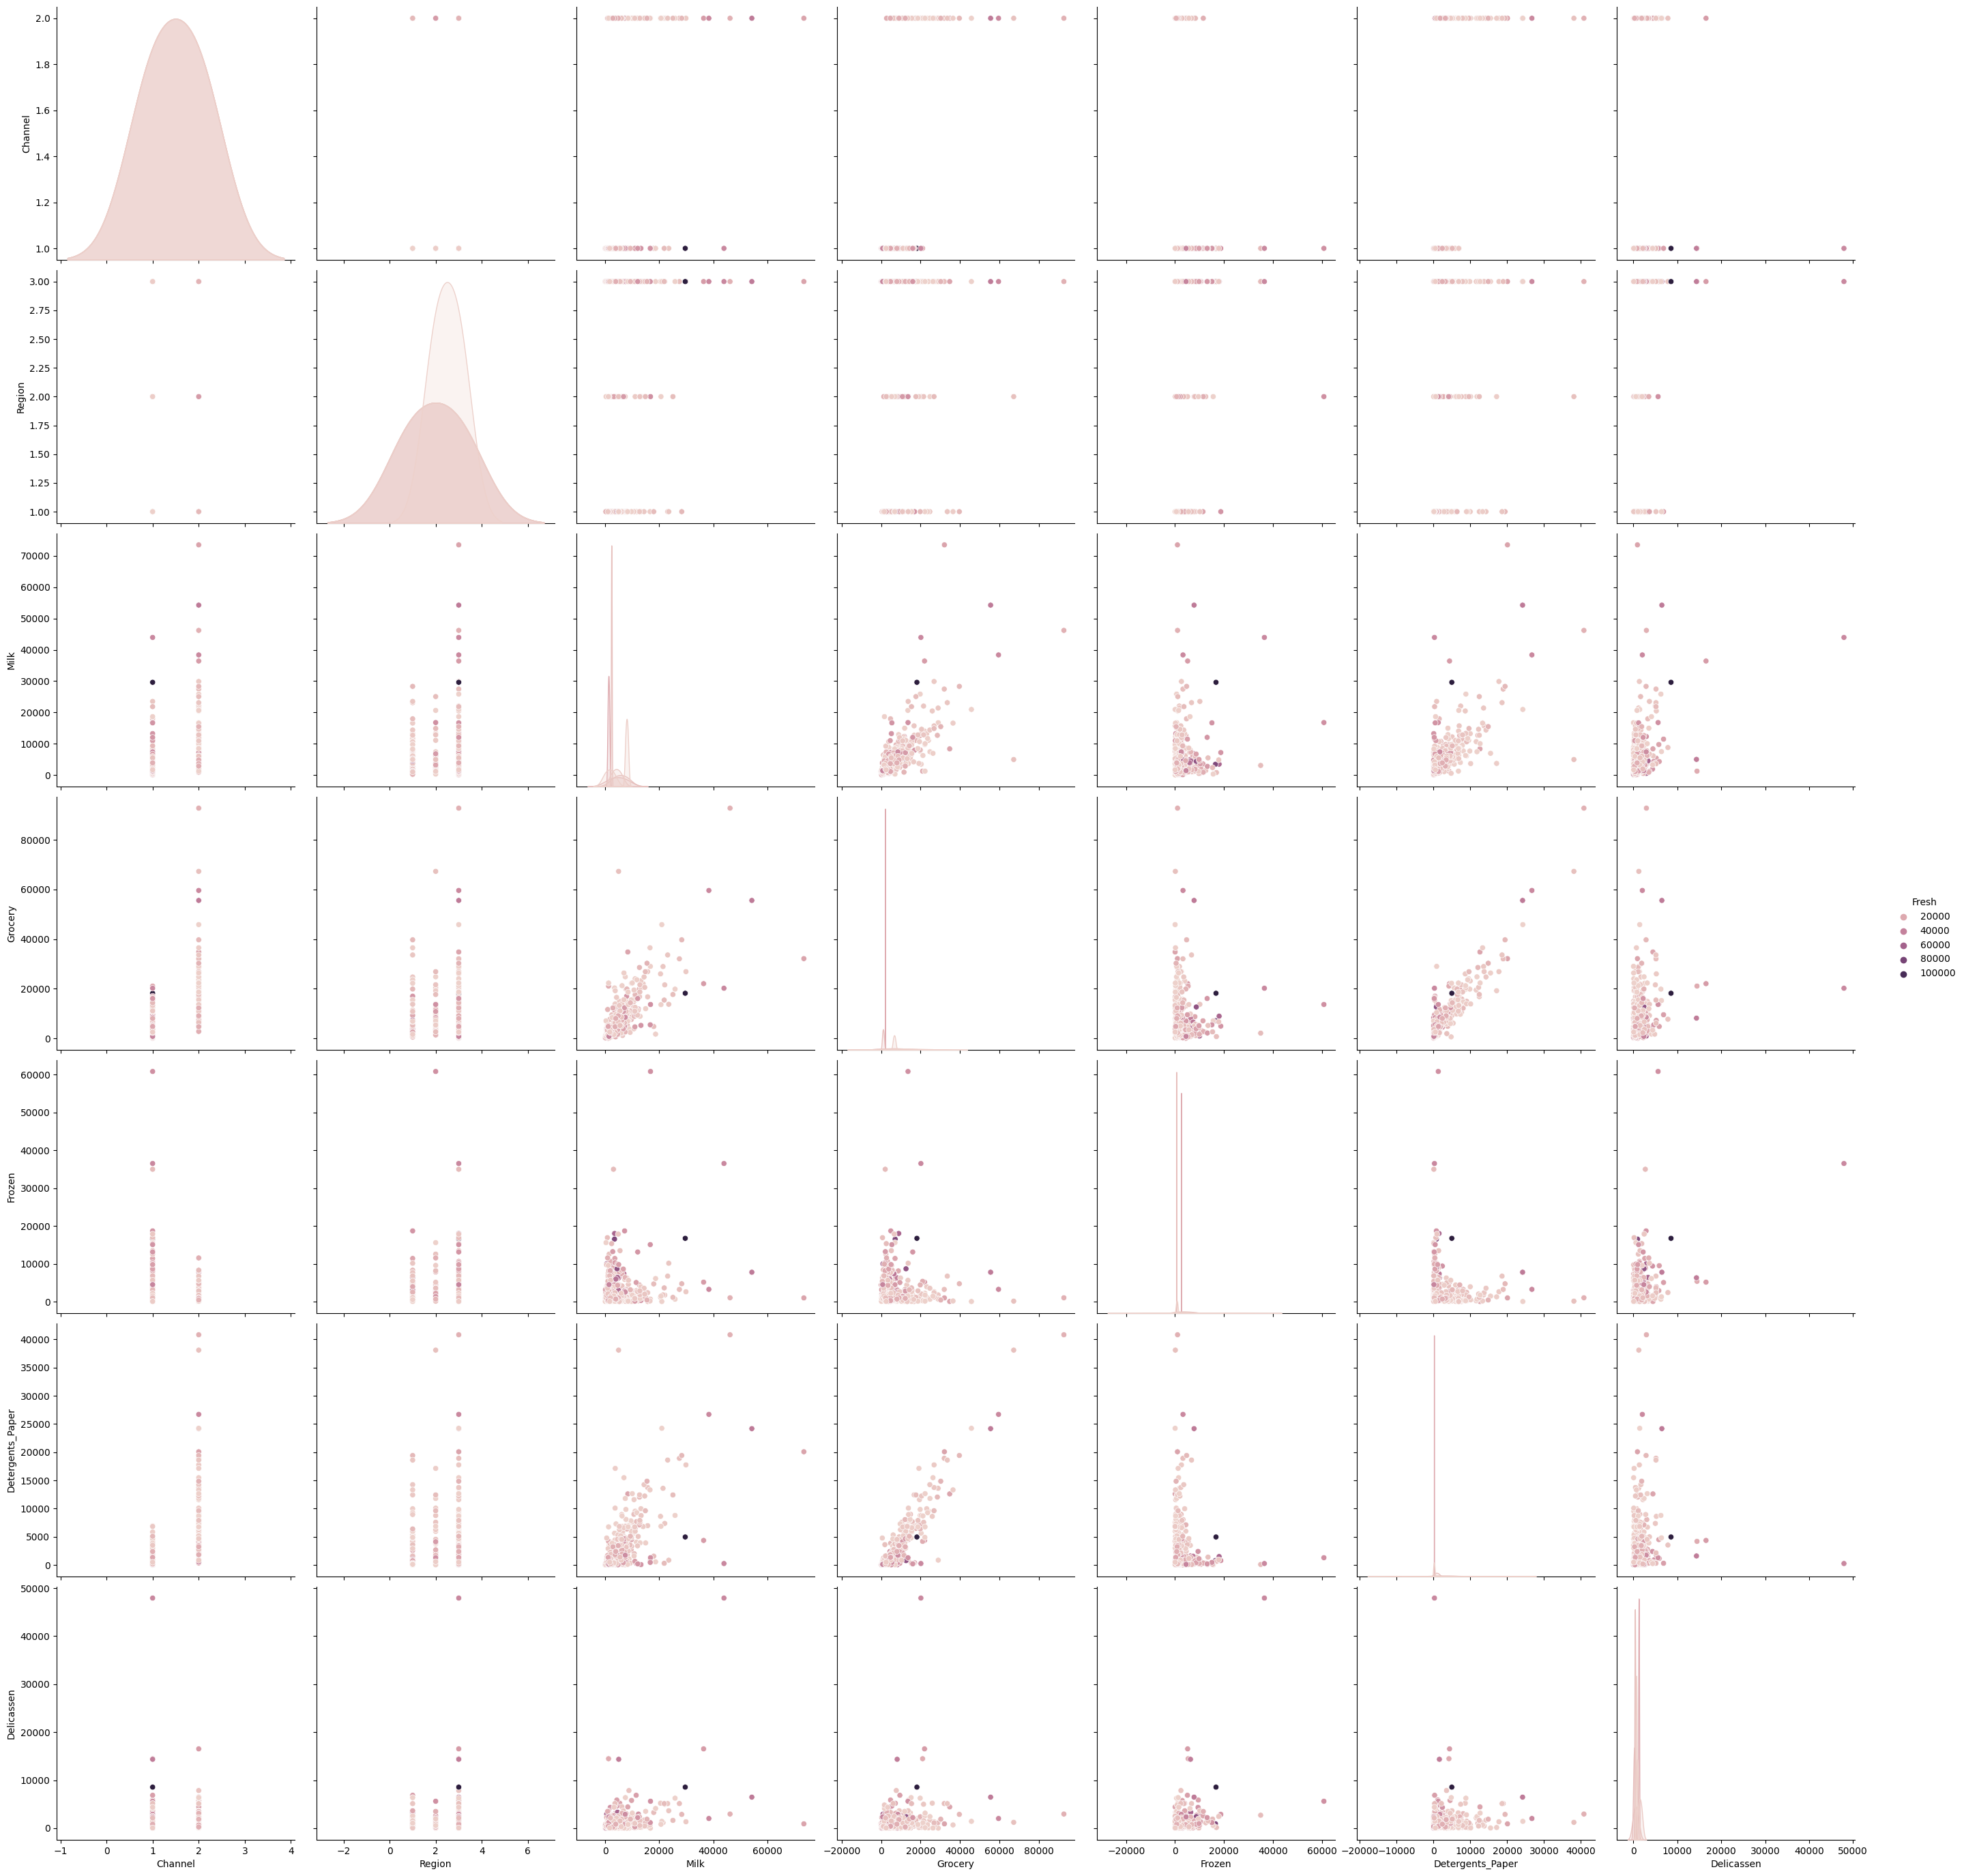

In [22]:
sns.pairplot(data, hue="Fresh", height=4)

In [23]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [25]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[2563   46  548  834  405  436  156 1215  405  548   46 2563  395  548
  548  405   46    3 1117  395 1215    3 2563  548  750  405 2563  548
    3 2563  395   46    3  395  548   46   46  247  395  548  395  548
  548   46  548   46   46 1117  405  548  395  548 2563  436   46 1117
  379  548  436  548  548  436  548   46    3  120    3  436  750    3
  405 1117   46  405  548  548  405  379  395  548    3  548  834  395
   46  436   46  610]


In [29]:
y_compare = py.vstack((y_test,y_pred)).T
y_compare[:5,:]

array([[ 806, 2563],
       [ 445,   46],
       [ 291,  548],
       [1625,  834],
       [1333,  405]])

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 0.0


In [31]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       0.0
          51       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       1.0
          84       0.00      0.00      0.00       1.0
         110       0.00      0.00      0.00       1.0
         120       0.00      0.00      0.00       0.0
         156       0.00      0.00      0.00       0.0
         167       0.00      0.00      0.00       1.0
         172       0.00      0.00      0.00       1.0
         195       0.00      0.00      0.00       1.0
         217       0.00      0.00      0.00       1.0
         225       0.00      0.00      0.00       1.0
         230       0.00      0.00      0.00       1.0
         238       0.00      0.00      0.00       1.0
         247       0.00      0.00      0.00       0.0
         270       0.00    

/Users/aadithlasar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aadithlasar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aadithlasar/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aadithlasar